<a href="https://colab.research.google.com/github/astudnicki/BME6938-Data-Mining/blob/master/MiniProject3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load the MNIST dataset into Keras**

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


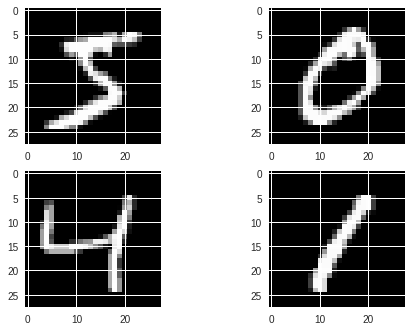

In [0]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

**Baseline Model with Multi-Layer Perceptrons**

In [0]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()



In [0]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]



# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model



# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.2811 - acc: 0.9206 - val_loss: 0.1411 - val_acc: 0.9574
Epoch 2/10
 - 6s - loss: 0.1115 - acc: 0.9677 - val_loss: 0.0910 - val_acc: 0.9714
Epoch 3/10
 - 6s - loss: 0.0716 - acc: 0.9798 - val_loss: 0.0784 - val_acc: 0.9771
Epoch 4/10
 - 6s - loss: 0.0503 - acc: 0.9856 - val_loss: 0.0752 - val_acc: 0.9762
Epoch 5/10
 - 6s - loss: 0.0373 - acc: 0.9893 - val_loss: 0.0680 - val_acc: 0.9788
Epoch 6/10
 - 6s - loss: 0.0268 - acc: 0.9928 - val_loss: 0.0613 - val_acc: 0.9809
Epoch 7/10
 - 6s - loss: 0.0208 - acc: 0.9946 - val_loss: 0.0627 - val_acc: 0.9803
Epoch 8/10
 - 6s - loss: 0.0140 - acc: 0.9971 - val_loss: 0.0625 - val_acc: 0.9803
Epoch 9/10
 - 6s - loss: 0.0107 - acc: 0.9977 - val_loss: 0.0576 - val_acc: 0.9818
Epoch 10/10
 - 6s - loss: 0.0083 - acc: 0.9983 - val_loss: 0.0603 - val_acc: 0.9819

**Simple Convolutional Neural Network for MNIST**

In [0]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]



def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model




# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 60s - loss: 0.2253 - acc: 0.9356 - val_loss: 0.0774 - val_acc: 0.9759
Epoch 2/10
 - 59s - loss: 0.0709 - acc: 0.9786 - val_loss: 0.0441 - val_acc: 0.9851
Epoch 3/10
 - 59s - loss: 0.0507 - acc: 0.9844 - val_loss: 0.0430 - val_acc: 0.9855
Epoch 4/10
 - 59s - loss: 0.0390 - acc: 0.9881 - val_loss: 0.0407 - val_acc: 0.9869
Epoch 5/10
 - 59s - loss: 0.0321 - acc: 0.9899 - val_loss: 0.0340 - val_acc: 0.9892
Epoch 6/10
 - 59s - loss: 0.0264 - acc: 0.9918 - val_loss: 0.0330 - val_acc: 0.9891
Epoch 7/10
 - 59s - loss: 0.0217 - acc: 0.9928 - val_loss: 0.0349 - val_acc: 0.9884
Epoch 8/10
 - 58s - loss: 0.0189 - acc: 0.9940 - val_loss: 0.0330 - val_acc: 0.9887
Epoch 9/10
 - 58s - loss: 0.0151 - acc: 0.9951 - val_loss: 0.0322 - val_acc: 0.9890
Epoch 10/10
 - 58s - loss: 0.0137 - acc: 0.9959 - val_loss: 0.0328 - val_acc: 0

**CIFAR10 Dataset with Multilayer Perceptron **

In [0]:
from keras.datasets import cifar10

#load data
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:

32*32*3


3072

In [0]:
from keras.datasets import cifar10

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2] * X_train.shape[3]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]



# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model



# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

170500096/170498071 [==============================] - 31s 0us/step
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 67s - loss: 13.1298 - acc: 0.1486 - val_loss: 13.1391 - val_acc: 0.1608
Epoch 2/10
 - 66s - loss: 13.1180 - acc: 0.1579 - val_loss: 13.0528 - val_acc: 0.1571
Epoch 3/10
 - 66s - loss: 13.0868 - acc: 0.1589 - val_loss: 12.9907 - val_acc: 0.1699
Epoch 4/10
 - 66s - loss: 12.9640 - acc: 0.1618 - val_loss: 12.0569 - val_acc: 0.1713
Epoch 5/10
 - 65s - loss: 4.1416 - acc: 0.2902 - val_loss: 1.7475 - val_acc: 0.3691
Epoch 6/10
 - 66s - loss: 1.6813 - acc: 0.4015 - val_loss: 1.6288 - val_acc: 0.4238
Epoch 7/10
 - 66s - loss: 1.6082 - acc: 0.4311 - val_loss: 1.6063 - val_acc: 0.4229
Epoch 8/10
 - 66s - loss: 1.5643 - acc: 0.4449 - val_loss: 1.5606 - val_acc: 0.4444
Epoch 9/10
 - 66s - loss: 1.5310 - acc: 0.4598 - val_loss: 1.5968 - val_acc: 0.435

**CIFAR Dataset with Simple Convolutional Neural Network** 

In [0]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [0]:
from keras.datasets import cifar10

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 3, 32, 32).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 3, 32, 32).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]



def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(3, 32, 32), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model




# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 88s - loss: 1.7383 - acc: 0.3811 - val_loss: 1.4591 - val_acc: 0.4830
Epoch 2/10
 - 87s - loss: 1.4017 - acc: 0.5022 - val_loss: 1.3482 - val_acc: 0.5212
Epoch 3/10
 - 86s - loss: 1.3086 - acc: 0.5386 - val_loss: 1.2595 - val_acc: 0.5639
Epoch 4/10
 - 86s - loss: 1.2311 - acc: 0.5687 - val_loss: 1.1998 - val_acc: 0.5770
Epoch 5/10
 - 86s - loss: 1.1643 - acc: 0.5923 - val_loss: 1.1484 - val_acc: 0.5972
Epoch 6/10
 - 86s - loss: 1.1116 - acc: 0.6148 - val_loss: 1.1433 - val_acc: 0.6003
Epoch 7/10
 - 86s - loss: 1.0675 - acc: 0.6300 - val_loss: 1.1103 - val_acc: 0.6105
Epoch 8/10
 - 89s - loss: 1.0275 - acc: 0.6425 - val_loss: 1.0645 - val_acc: 0.6315
Epoch 9/10
 - 88s - loss: 0.9987 - acc: 0.6

**RESNET50 with CIFAR10 dataset **

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2
#from resnets_utils import *
from keras.applications.resnet50 import ResNet50


from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint


In [0]:
from keras.datasets import cifar10

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3).astype('float32')

#Y_test = y_test
#Y_train = y_train

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 50000
number of test examples = 10000
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 10)


In [0]:
img_height = 32
img_width = 32 
num_classes = 10
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
base_model = applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (img_height,img_width,3))

#NOTE -- the imagenet outputs 1000 last layer of softmax... so need to take this off "include_top = FALSE"

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [0]:
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, epochs = 10, batch_size = 64)

Epoch 1/10
50000/50000 [==============================] - 3982s 80ms/step - loss: 2.2319 - acc: 0.3128
Epoch 2/10
50000/50000 [==============================] - 3881s 78ms/step - loss: 2.0358 - acc: 0.3532
Epoch 3/10
50000/50000 [==============================] - 3935s 79ms/step - loss: 2.2606 - acc: 0.2752
Epoch 4/10
50000/50000 [==============================] - 3951s 79ms/step - loss: 2.0349 - acc: 0.3231
Epoch 5/10
50000/50000 [==============================] - 3893s 78ms/step - loss: 1.8338 - acc: 0.3824
Epoch 6/10
  192/50000 [..............................] - ETA: 1:06:50 - loss: 1.8686 - acc: 0.4323